1. Achar um banco de dados para ajudar (Pior que o que eu estou usando tem problema nenhum..)
2. Adicionar aqueles códigos que mudam o display de notebooks...

#### Em conferindo/limpando:

- Fazer a leitura dos dados ( + versão para quando tem formatos malucos);
- Detectar os tipos das colunas;
- Alterar os tipo das colunas para ficar certo;
- Aqueles passos de retirada de colunas igual ao que eu fiz na Sicredi;
- Será que eu consigo detectar se alguma observação está com padrão diferente dos demais? por exemplo, uma letra em meio a números ou uma data específica com formatação diferente?


#### Nas análises:

- Fazer uma espécie de skim mais correto ou describe mais completo (Métricas, número nulos, distribuição);
- Olhar a correlação entre uma variável e as demais;
- Alguma forma de simplificar a junção de dados;

Acho que o mais importante é montar uma função única que receba os dois dataframes, e compare:
- o número de linhas;
- as colunas que estão diferentes (ás vezes até a ordem pode influenciar algo);
- os tipos das colunas que estão diferentes;
- quais colunas possuem letras, números, vírgulas, pontos, barras, dois pontos, aspas;
- tabela com a quantidade de nulos, mínimo, máximo, variância, número de categorias, período considerado pelas datas, porcentagem de linhas duplicadas e destacar o que estiver mais diferente;

In [ ]:
from skimpy import skim
skim(scr_teste)

In [ ]:
df.agg(*[f.sum(x).alias(f'sum_{x}') for x in clicks])

# Conferindo/Limpando dados com Pandas

In [1]:
import pandas as pd

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("data/Credit.csv", sep=";", encoding="latin_1")

# 'ascii','big5','big5hkscs','cp037','cp273','cp424','cp437','cp500','cp720','cp737','cp775','cp850','cp852','cp855',
# 'cp856','cp857','cp858','cp860','cp861','cp862','cp863','cp864','cp865','cp866','cp869','cp874','cp875','cp932','cp949',
# 'cp950','cp1006','cp1026','cp1125','cp1140','cp1250','cp1251','cp1252','cp1253','cp1254','cp1255','cp1256','cp1257','cp1258',
# 'euc_jp','euc_jis_2004','euc_jisx0213','euc_kr','gb2312','gbk','gb18030','hz','iso2022_jp','iso2022_jp_1','iso2022_jp_2',
# 'iso2022_jp_2004','iso2022_jp_3','iso2022_jp_ext','iso2022_kr','latin_1','iso8859_2','iso8859_3','iso8859_4','iso8859_5','iso8859_6',
# 'iso8859_7','iso8859_8','iso8859_9','iso8859_10','iso8859_11','iso8859_13','iso8859_14','iso8859_15','iso8859_16','johab','koi8_r','koi8_t',
# 'koi8_u','kz1048','mac_cyrillic','mac_greek','mac_iceland','mac_latin2','mac_roman','mac_turkish','ptcp154','shift_jis','shift_jis_2004',
# 'shift_jisx0213','utf_32','utf_32_be','utf_32_le','utf_16','utf_16_be','utf_16_le','utf_7','utf_8','utf_8_sig'

In [3]:
df.dtypes

CHEQUEESPECIAL           object
USO_CREDITO               int64
HISTORICO_CREDITO        object
PROPOSITO                object
BALANCO_ATUAL             int64
BALANCO_MEDIO_CREDITO    object
EMPREGADO                object
LOCAL                     int64
ESTADOCIVIL              object
OUTRASFUNCOES            object
RESIDENCIADESDE           int64
TIPOSBENS                object
IDADE                     int64
OUTROSPLANOSPGTO         object
RESIDENCIA               object
CREDITOSEXISTENTES        int64
EMPREGO                  object
DEPENDENTES               int64
TRABAESTRANGEIRO         object
CLASSE                   object
dtype: object

In [ ]:
# Confirma todos os tipos presentes nos dados!
df.dtypes.to_frame("type").groupby("type").value_counts()

In [7]:
df = pd.DataFrame({"data1": ["2022-01-01", "2022-01-01", "2022-01-01"],
                   "data2": ["2022/01/01", "2022/01/01", "2022/01/01"],
                   "data3": ["01/01/2022", "01/01/2022", "01/01/2022"],
                   "num1": ["01", "2022", "02"],
                   "num2": ["0,1", "20,22", "0,2"],
                   "num3": ["0.1", "20.22", "0.2"]})
df

,data1,data2,data3,num1,num2,num3
0,2022-01-01,2022/01/01,01/01/2022,01,"0,1",0.1
1,2022-01-01,2022/01/01,01/01/2022,2022,"20,22",20.22
2,2022-01-01,2022/01/01,01/01/2022,02,"0,2",0.2


In [18]:
# Primeiro uma função que caso a coluna numérica/data esteja inicialmente como string seja corretamente tipada
# Posso separar as transformações por função, para dessa forma utilizar try catch e até mostrar se alguma coluna deu ruim
to_compare = pd.DataFrame({"columns_names": df.columns, 
                           "initial_types": df.dtypes, 
                           "initial_n_nulls": df.isnull().sum()})

for column in df.select_dtypes("object").columns:
    """ A loop to fix numeric ou date columns that were initiallly assigned as object columns. And shows already if the number 
        of nulls changed.
    """
    if sum(df[column].str.contains("[:alpha:]")) == 0:
        if sum(df[column].str.contains("-")) + sum(df[column].str.contains("/")) != 0:
            df[column] = pd.to_datetime(df[column])
        else:
            if sum(df[column].str.contains(",")) != 0:
                df[column] = df[column].str.replace(",", ".")
            df[column] = df[column].astype("float")
            
to_compare["final_types"] = df.dtypes
to_compare["final_n_nulls"] = df.isnull().sum()
to_compare

,columns_names,initial_types,initial_n_nulls,final_types,final_n_nulls
data1,data1,object,0,datetime64[ns],0
data2,data2,object,0,datetime64[ns],0
data3,data3,object,0,datetime64[ns],0
num1,num1,object,0,float64,0
num2,num2,object,0,float64,0
num3,num3,object,0,float64,0


In [ ]:
# Existem outros conjuntos de tipos que rgeralmente devem ser trocados? Tipo inicialmente numérico que era para ser data.

In [19]:
df.describe()

,num1,num2,num3
count,3.000000,3.000000,3.000000
mean,675.000000,6.840000,6.840000
std,1166.536326,11.587528,11.587528
min,1.000000,0.100000,0.100000
25%,1.500000,0.150000,0.150000
50%,2.000000,0.200000,0.200000
75%,1012.000000,10.210000,10.210000
max,2022.000000,20.220000,20.220000


In [11]:
df.select_dtypes("object").describe()

,data1,data2,data3,num1,num2,num3
count,3,3,3,3,3,3
unique,1,1,1,3,3,3
top,2022-01-01,2022/01/01,01/01/2022,01,"0,1",0.1
freq,3,3,3,1,1,1


In [20]:
df.select_dtypes("datetime").describe()

/tmp/ipykernel_125059/3976170989.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.select_dtypes("datetime").describe()
/tmp/ipykernel_125059/3976170989.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.select_dtypes("datetime").describe()
/tmp/ipykernel_125059/3976170989.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.select_dtypes("datetime").describe()


,data1,data2,data3
count,3,3,3
unique,1,1,1
top,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00
freq,3,3,3
first,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00
last,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00


# Conferindo/Limpando dados com Pyspark

In [2]:
from pyspark.sql import SparkSession
# export PYSPARK_SUBMIT_ARGS="--master local[2] pyspark-shell"

# Estou tendo esse erro porque não tenho o java instalado, e meu notebook que nem Ubuntu tem... talvez seja
# melhor eu fazer isso usando o notebook do trabalho, viu...

spark = (SparkSession.builder
            .master('local[*]')
            .appName("Iniciando com Spark")
            .getOrCreate())

SyntaxError: invalid syntax (<ipython-input-2-d84b03b9e7f5>, line 2)

# Análises utilizando Pandas+Seaborn(?)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("data/Credit.csv", sep=";", encoding="latin_1")
df["id"] = range(len(df))
df.head()

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE,id
0,<0,6,crítica / outros de crédito existente,Computador/TV,1169,nenhuma economia conhecida,>=7,4,masculino solteiro,nenhum,4,bens imóveis,67,nenhum,própria,2,especializado,1,sim,bom,0
1,0<=X<200,48,existente e pago,Computador/TV,5951,<100,1<=X<4,2,fem div/cas,nenhum,2,bens imóveis,22,nenhum,própria,1,especializado,1,sim,ruim,1
2,sem cheque,12,crítica / outros de crédito existente,educação,2096,<100,4<=X<7,2,masculino solteiro,nenhum,3,bens imóveis,49,nenhum,própria,1,não especializado,2,sim,bom,2
3,<0,42,existente e pago,mobilia/equipamento,7882,<100,4<=X<7,2,masculino solteiro,fiador,4,seguro de vida,45,nenhum,gratuitamente,1,especializado,2,sim,bom,3
4,<0,24,atrasos anteriores,carro novo,4870,<100,1<=X<4,3,masculino solteiro,nenhum,4,nenhuma conhecida,53,nenhum,gratuitamente,2,especializado,2,sim,ruim,4


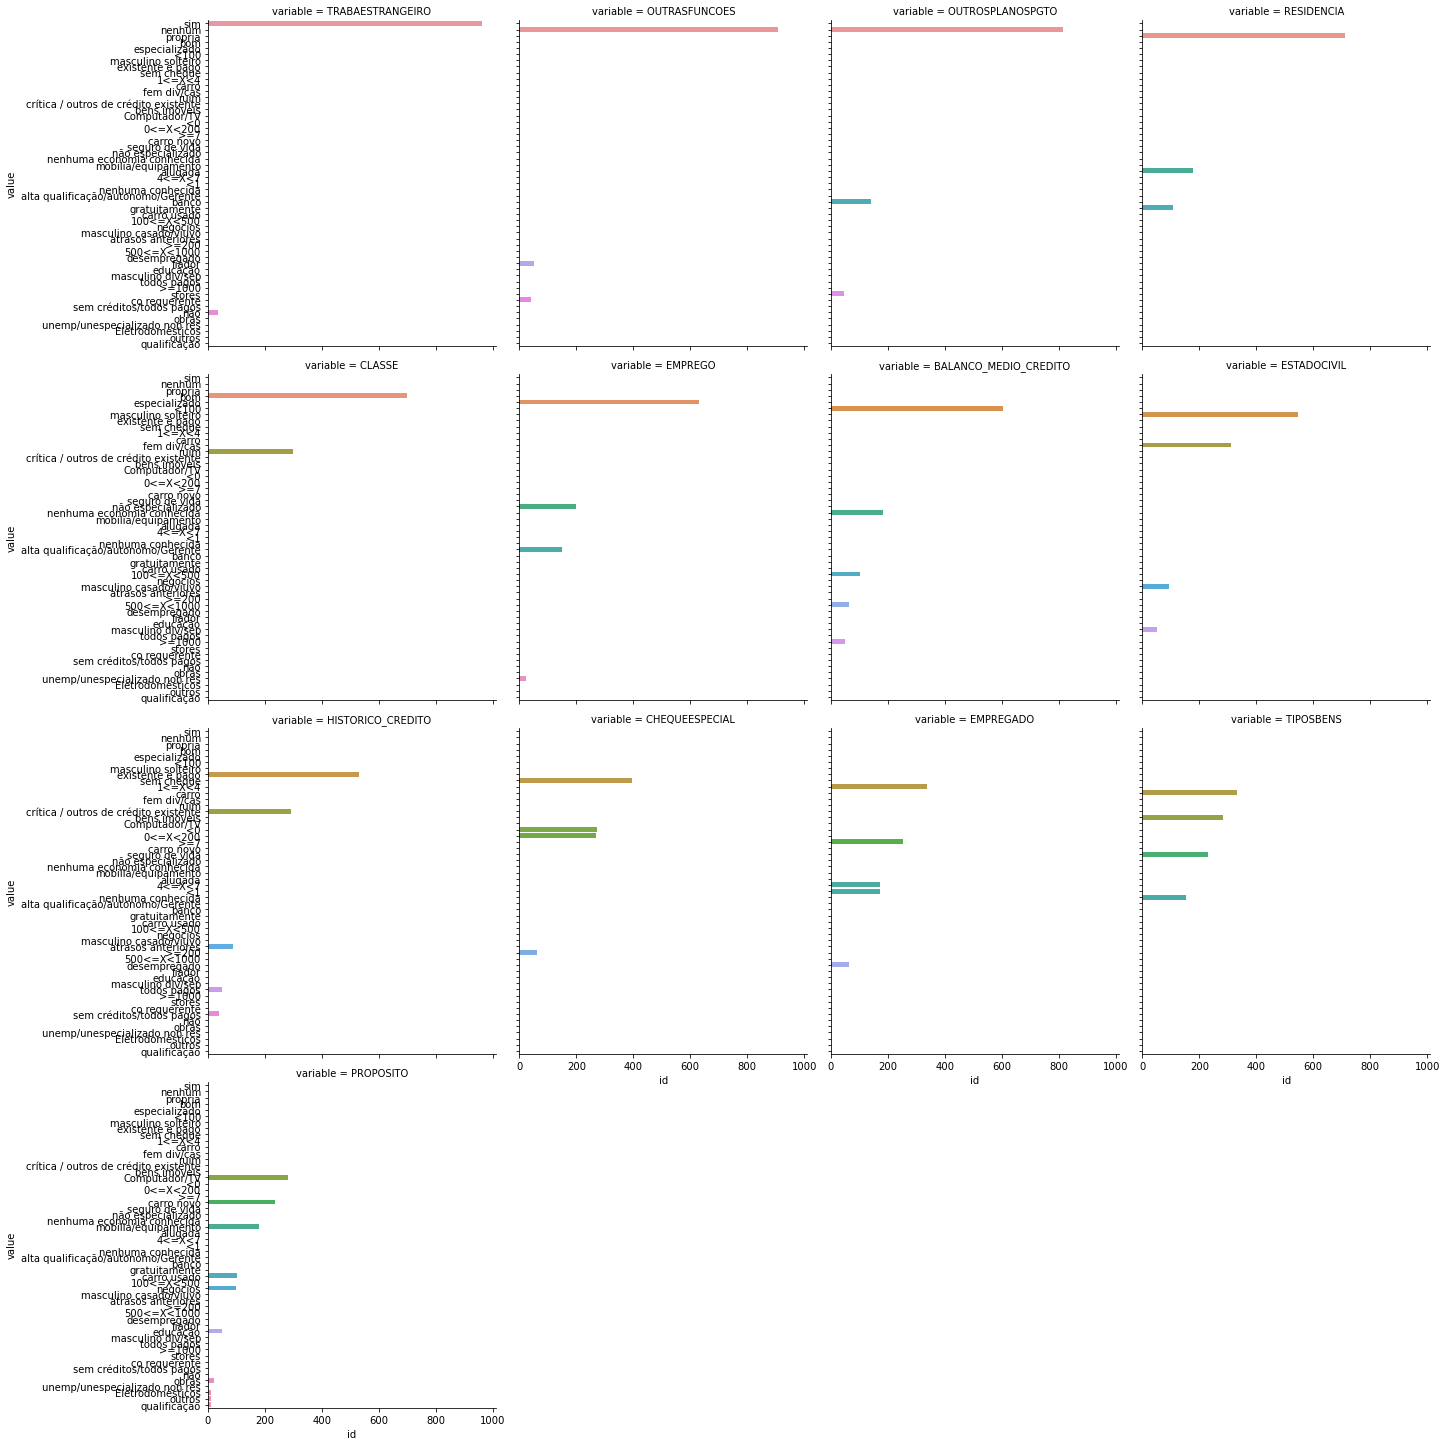

In [3]:
# Gráficos de Barras para as Categóricas

df_melt_cat = df.melt(id_vars=["id"], value_vars=df.select_dtypes("object"))
df_melt_cat = df_melt_cat.groupby(["variable", "value"]).count().sort_values(by = ["id", "variable"], ascending=False)
sns.catplot(data=df_melt_cat.reset_index(), y = "value", x="id", kind = "bar", col = "variable", col_wrap = 4, 
            facet_kws={"sharey":False, "sharex":False})
plt.show()

<ipython-input-46-dcbe5345be3f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


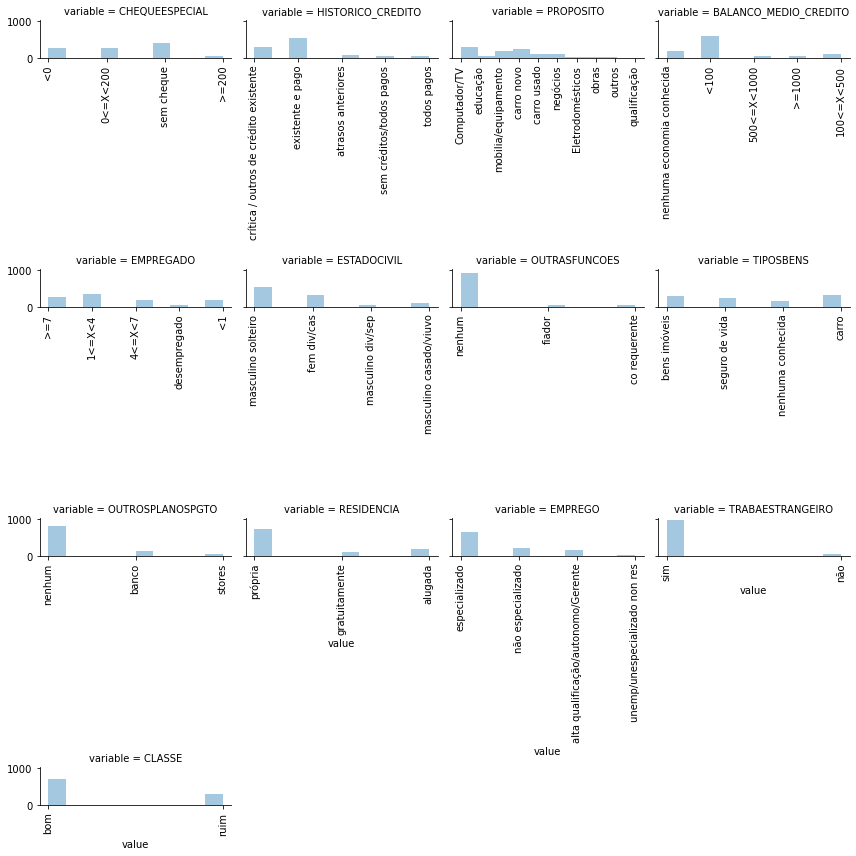

In [46]:
# Mas também não consegui ordernar....

df_melt_cat = df.melt(id_vars=["id"], value_vars=df.select_dtypes("object"))
g = sns.FacetGrid(df_melt_cat, 
                  col="variable",
                  col_wrap=4, 
                  sharex=False
                 )
plot = g.map(plt.hist, "value", alpha=.4)#.fig.subplots_adjust(wspace=0.5, hspace=2)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    
plt.tight_layout()

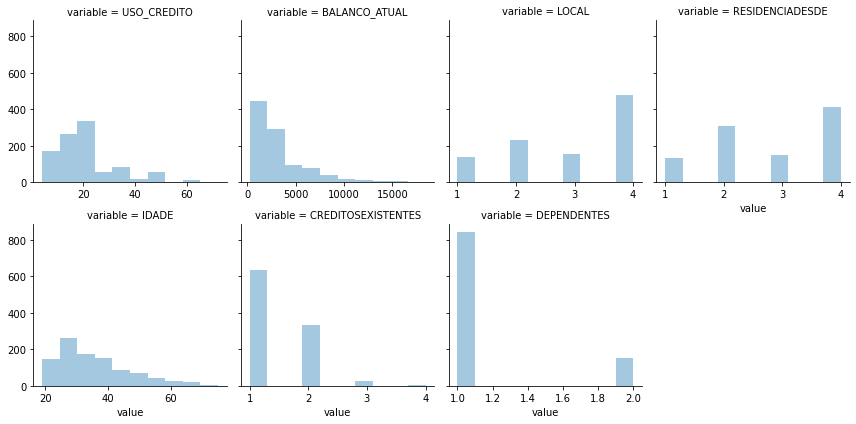

In [8]:
# Histogramas para as Numéricas

df_melt_num = df.melt(id_vars=["id"], value_vars=df.select_dtypes(["float64", "int64"]))
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=4, sharex=False)
g.map(plt.hist, "value", alpha=.4)

In [ ]:
# Boxplots para Comparar Target Numérico e Variáveis Categóricas

In [ ]:
# Matriz de Correlação para Comparar Target Numérico e Variáveis Numéricas

In [ ]:
# Gráfico de Barras Empilhadas para Target Categórico e Variáveis Categóricas

In [ ]:
# Boxplots para Comparar Target Categórico e Variáveis Numéricas

In [ ]:
# Comportamento das Variáveis pelo tempo

In [ ]:
df_melted = pd.melt(df, id_vars=['chave_anonima', "target"], value_vars=df.columns....)
sns.relplot(data = df_melted, x = "value", y = "target", kind = "scatter", col = "variable", col_wrap = 3,
            facet_kws = {"sharey": False}) 
plt.show()

# Análises utilizando Pyspark